**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 8 – PCA

Nok Wongpiromsarn, 16 October 2020

**Credit:** https://github.com/asukul/DS301-f19/blob/master/Lab_6_PCA_Fashion_MNIST.ipynb by Adisak Sukul

**Instructions:**
1. Construct the training and test sets: X_train, y_train, X_test, y_test from the fashion_mnist (Links to an external site.) dataset. Reshape X_train such that it becomes a 2D array.
2. Project X_train onto the hyperplane defined by the first d = 4 principal components. Make sure you scale your features.
3. Display explained_variance_ratio_  of the PCA obtained from step 2.
4. Compute and display the number of principal components required to obtain
   - 25% variance
   - 50% variance
   - 75% variance
   - 95% variance
5. Apply PCA to compress X_train such that 75% of its variance is preserved.
6. Compared the size of the original X_train and the one obtained from step 5.
7. Pick your favorite classifier. Compare the computation time of classifier.fit() between using the original dataset and using the compressed dataset obtained from step 5.
8. Use the test set to compare the accuracy of the models generated in step 7 with and without applying PCA.

### 1. Construct the training and test sets: X_train, y_train, X_test, y_test from the fashion_mnist (Links to an external site.) dataset. Reshape X_train such that it becomes a 2D array.

In [1]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# X_train is a 3D array with shape (60000, 28, 28). Reshape it to get a 2D array.
# To do
print(X_train.shape)
print(X_train.dtype)

(60000, 784)
uint8


### 2. Project X_train onto the hyperplane defined by the first d = 4 principal components

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# First we need to scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Project X_scaled to the first 4 principal components
# To-do

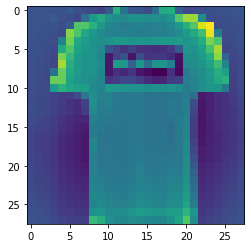

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_scaled[1].reshape(28, 28))

### 3. Display explained_variance_ratio_  of the PCA obtained from step 2

<AxesSubplot:>

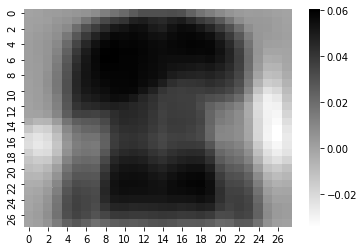

In [5]:
import seaborn as sns

sns.heatmap(pca.components_[0].reshape(28, 28), cmap='gray_r')

### 4. Compute and display the number of principal components required to obtain 
- 25% variance
- 50% variance
- 75% variance
- 95% variance
- 100% variance

In [7]:
print("The number of principal components required to obtain")
print("  25% variance: {}".format(d25))
print("  50% variance: {}".format(d50))
print("  75% variance: {}".format(d75))
print("  95% variance: {}".format(d95))

The number of principal components required to obtain
  25% variance: 2
  50% variance: 5
  75% variance: 32
  95% variance: 256


## 5. Apply PCA to compress X_train such that 75% of its variance is preserved

### 6. Compared the size of the original X_train and the one obtained from step 5

In [9]:
print("X_train size: {}".format(X_scaled.nbytes))
print("X_pca size: {}".format(X_pca.nbytes))

X_train size: 376320000
X_pca size: 15360000


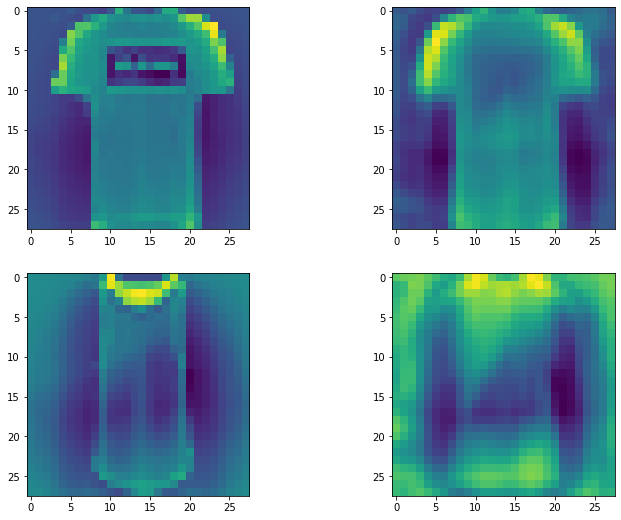

In [10]:
plot_indices = [1, 2]

num_rows = len(plot_indices)
f, axarr = plt.subplots(num_rows,2, figsize=(12, 9))

for row in range(len(plot_indices)):
    axarr[row, 0].imshow(X_scaled[plot_indices[row]].reshape(28, 28))
    axarr[row, 1].imshow(X_recovered[plot_indices[row]].reshape(28, 28))

### 7. Pick your favorite classifier. Compare the computation time of classifier.fit() between using the original dataset and using the compressed dataset obtained from step 5.

In [11]:
import time
from sklearn.linear_model import LogisticRegression

clf_ori = LogisticRegression(solver = 'lbfgs', multi_class='auto')

start_time = time.time()
clf_ori.fit(X_scaled, y_train)
end_time = time.time()
print("Without PCA, take {} seconds".format(end_time - start_time))

Without PCA, take 14.82542371749878 seconds


/home/nok/anaconda3/envs/ds301/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 8. Use the test set to compare the accuracy of the models generated in step 7 with and without applying PCA.

In [13]:
from sklearn.metrics import accuracy_score

X_test_scaled = scaler.transform(X_test.reshape(-1, 28 * 28))
X_test_pca = pca.transform(X_test_scaled)

y_pred_ori = clf_ori.predict(X_test_scaled)
y_pred_pca = clf_pca.predict(X_test_pca)

print("Accuracy without PCA: {}".format(accuracy_score(y_test, y_pred_ori)))
print("Accuracy with PCA:    {}".format(accuracy_score(y_test, y_pred_pca)))

Accuracy without PCA: 0.8439
Accuracy with PCA:    0.8066
